In [1]:
# pip install scikit-learn

In [2]:
import csv

import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [4]:
NUM_CLASSES = 7

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [10]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 5s - loss: 2.0671 - accuracy: 0.1016
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 1s 28ms/step - loss: 2.0846 - accuracy: 0.1118 - val_loss: 1.8968 - val_accuracy: 0.1268
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0664 - accuracy: 0.1562
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 2.0031 - accuracy: 0.1410 - val_loss: 1.8636 - val_accuracy: 0.1549
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9507 - accuracy: 0.1719
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 1.9429 - accuracy: 0.1438 - val_loss: 1.8457 - val_accuracy: 0.2085
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9419 - accuracy: 0.1562
Epoch 4: sav

9/9 [==============================] - 0s 10ms/step - loss: 1.4382 - accuracy: 0.4962 - val_loss: 1.2829 - val_accuracy: 0.5831
Epoch 29/1000
8/9 [=========================>....] - ETA: 0s - loss: 1.3716 - accuracy: 0.5117
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 1.3726 - accuracy: 0.5132 - val_loss: 1.2673 - val_accuracy: 0.5887
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.3456 - accuracy: 0.5391
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 1.3914 - accuracy: 0.5113 - val_loss: 1.2544 - val_accuracy: 0.6000
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.4953 - accuracy: 0.4844
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 1.3634 - accuracy: 0.5132 - val_loss: 1.24

Epoch 56/1000
7/9 [======================>.......] - ETA: 0s - loss: 1.0616 - accuracy: 0.6261
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 1.0731 - accuracy: 0.6175 - val_loss: 0.8699 - val_accuracy: 0.6845
Epoch 57/1000
6/9 [===================>..........] - ETA: 0s - loss: 1.1102 - accuracy: 0.6198
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 1.1244 - accuracy: 0.6053 - val_loss: 0.8541 - val_accuracy: 0.6901
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.1196 - accuracy: 0.6250
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 1.1027 - accuracy: 0.6109 - val_loss: 0.8405 - val_accuracy: 0.6901
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.0966 - accuracy: 0.6250
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 0.8959 - accuracy: 0.6719
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.9587 - accuracy: 0.6523 - val_loss: 0.6229 - val_accuracy: 0.8169
Epoch 84/1000
8/9 [=========================>....] - ETA: 0s - loss: 0.9587 - accuracy: 0.6592
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 0.9646 - accuracy: 0.6570 - val_loss: 0.6186 - val_accuracy: 0.8197
Epoch 85/1000
7/9 [======================>.......] - ETA: 0s - loss: 0.9354 - accuracy: 0.6708
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 0.9234 - accuracy: 0.6776 - val_loss: 0.6092 - val_accuracy: 0.8282
Epoch 86/1000
5/9 [===============>..............] - ETA: 0s - loss: 0.9625 - accuracy: 0.6562
Epoch 86: saving mo

1/9 [==>...........................] - ETA: 0s - loss: 0.8363 - accuracy: 0.7266
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.8386 - accuracy: 0.7105 - val_loss: 0.5085 - val_accuracy: 0.8282
Epoch 111/1000
9/9 [==============================] - ETA: 0s - loss: 0.8306 - accuracy: 0.7058
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.8306 - accuracy: 0.7058 - val_loss: 0.4986 - val_accuracy: 0.8394
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.9035 - accuracy: 0.6641
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.8769 - accuracy: 0.6955 - val_loss: 0.4946 - val_accuracy: 0.8732
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7967 - accuracy: 0.7031
Epoch 113: sa

9/9 [==============================] - ETA: 0s - loss: 0.7906 - accuracy: 0.7274
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 25ms/step - loss: 0.7906 - accuracy: 0.7274 - val_loss: 0.4207 - val_accuracy: 0.9211
Epoch 138/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.8060 - accuracy: 0.7344
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.7813 - accuracy: 0.7274 - val_loss: 0.4248 - val_accuracy: 0.9099
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6890 - accuracy: 0.7734
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.7616 - accuracy: 0.7387 - val_loss: 0.4252 - val_accuracy: 0.9070
Epoch 140/1000
6/9 [===================>..........] - ETA: 0s - loss: 0.8328 - accuracy: 0.7174
Epoch 140: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.7392 - accuracy: 0.7656
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 0.7181 - accuracy: 0.7538 - val_loss: 0.3675 - val_accuracy: 0.9296
Epoch 165/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.7891
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 0.7272 - accuracy: 0.7575 - val_loss: 0.3771 - val_accuracy: 0.9380
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.8348 - accuracy: 0.7266
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.7448 - accuracy: 0.7481 - val_loss: 0.3695 - val_accuracy: 0.9380
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.8792 - accuracy: 0.6797
Epoch 167: sa

6/9 [===================>..........] - ETA: 0s - loss: 0.7532 - accuracy: 0.7383
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 0.7542 - accuracy: 0.7378 - val_loss: 0.3283 - val_accuracy: 0.9662
Epoch 192/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6797 - accuracy: 0.7656
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.7278 - accuracy: 0.7444 - val_loss: 0.3276 - val_accuracy: 0.9662
Epoch 193/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6895 - accuracy: 0.7422
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.7351 - accuracy: 0.7321 - val_loss: 0.3292 - val_accuracy: 0.9634
Epoch 194/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7770 - accuracy: 0.7422
Epoch 194: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.8125
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.7688 - val_loss: 0.3125 - val_accuracy: 0.9718
Epoch 219/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.7734
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.6642 - accuracy: 0.7622 - val_loss: 0.3107 - val_accuracy: 0.9718
Epoch 220/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7491 - accuracy: 0.7812
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.7013 - accuracy: 0.7509 - val_loss: 0.3063 - val_accuracy: 0.9606
Epoch 221/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7694 - accuracy: 0.7266
Epoch 221: sav

5/9 [===============>..............] - ETA: 0s - loss: 0.6247 - accuracy: 0.7797
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 0.6498 - accuracy: 0.7726 - val_loss: 0.2888 - val_accuracy: 0.9746
Epoch 246/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.7656
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.6462 - accuracy: 0.7669 - val_loss: 0.2865 - val_accuracy: 0.9746
Epoch 247/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7462 - accuracy: 0.7500
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.6818 - accuracy: 0.7650 - val_loss: 0.2837 - val_accuracy: 0.9746
Epoch 248/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.7500
Epoch 248: sav

6/9 [===================>..........] - ETA: 0s - loss: 0.6656 - accuracy: 0.7591
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 0.6527 - accuracy: 0.7641 - val_loss: 0.2879 - val_accuracy: 0.9662
Epoch 273/1000
7/9 [======================>.......] - ETA: 0s - loss: 0.6566 - accuracy: 0.7734
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.6583 - accuracy: 0.7744 - val_loss: 0.2852 - val_accuracy: 0.9662
Epoch 274/1000
6/9 [===================>..........] - ETA: 0s - loss: 0.6097 - accuracy: 0.7904
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 0.6128 - accuracy: 0.7914 - val_loss: 0.2771 - val_accuracy: 0.9718
Epoch 275/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7774 - accuracy: 0.7109
Epoch 275: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.7500
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 0.6023 - accuracy: 0.7848 - val_loss: 0.2581 - val_accuracy: 0.9662
Epoch 300/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7891
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.6344 - accuracy: 0.7754 - val_loss: 0.2638 - val_accuracy: 0.9690
Epoch 301/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5470 - accuracy: 0.8281
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 0.6033 - accuracy: 0.7904 - val_loss: 0.2561 - val_accuracy: 0.9775
Epoch 302/1000
5/9 [===============>..............] - ETA: 0s - loss: 0.6348 - accuracy: 0.7906
Epoch 302: sa

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 6ms/step - loss: 0.2426 - accuracy: 0.9746


In [14]:
model = tf.keras.models.load_model(model_save_path)

In [15]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 146ms/step
[9.2332399e-01 2.0724139e-03 8.9999157e-05 2.2208274e-03 6.7474656e-02
 4.7792178e-03 3.8836759e-05]
0


In [16]:
# pip install matplotlib

In [17]:
# pip install seaborn

12/12 [==============================] - 0s 921us/step


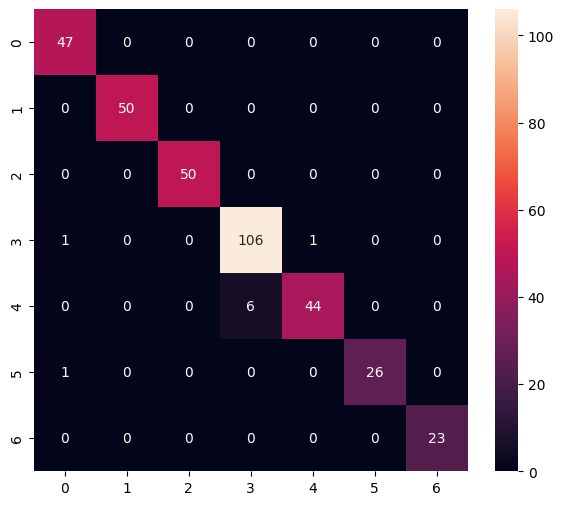

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       0.95      0.98      0.96       108
           4       0.98      0.88      0.93        50
           5       1.00      0.96      0.98        27
           6       1.00      1.00      1.00        23

    accuracy                           0.97       355
   macro avg       0.98      0.97      0.98       355
weighted avg       0.98      0.97      0.97       355



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [19]:

model.save(model_save_path, include_optimizer=False)

In [20]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\computer\AppData\Local\Temp\tmprm_qnx16\assets


INFO:tensorflow:Assets written to: C:\Users\computer\AppData\Local\Temp\tmprm_qnx16\assets


6676

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2332387e-01 2.0724176e-03 8.9999223e-05 2.2208260e-03 6.7474768e-02
 4.7792243e-03 3.8836752e-05]
0
